In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

In [4]:
# Part 1: Get the Data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label: 7


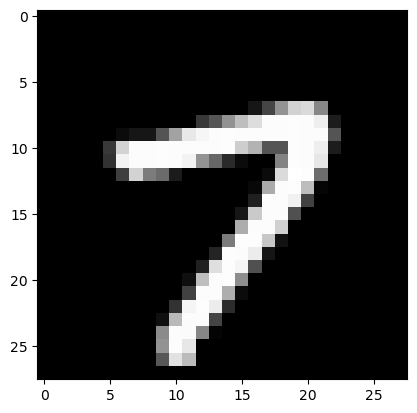

In [8]:
image_index = 505
plt.imshow(x_train[image_index], cmap='gray')
print('label:', y_train[image_index])

label: 6


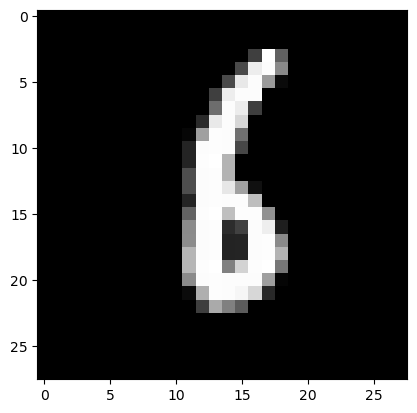

In [9]:
image_index = 1100
plt.imshow(x_train[image_index], cmap='gray')
print('label:', y_train[image_index])

In [10]:
x_train_final = x_train / 255
x_train_final.shape

(60000, 28, 28)

In [11]:
x_test_final = x_test / 255
x_test_final.shape

(10000, 28, 28)

In [16]:
#first_method

In [17]:
x_train_final = x_train.reshape(-1,28, 28, 1)/ 255
x_train_final.shape

(60000, 28, 28, 1)

In [18]:
x_test_final = x_test.reshape(-1, 28, 28, 1)/ 255
x_test_final.shape

(10000, 28, 28, 1)

In [20]:
#second_moethod

In [21]:
x_train_final = np.expand_dims(x_train, axis= -1) / 255
x_train_final.shape

(60000, 28, 28, 1)

In [22]:
x_test_final = np.expand_dims(x_test, axis= -1) / 255
x_test_final.shape

(10000, 28, 28, 1)

In [27]:
 # To categorical (One-Hot Encoding)

In [28]:
from keras.utils import to_categorical

In [29]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [30]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [31]:
y_train_cat[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
y_train[5]

2

In [33]:
# CNN

In [34]:
from  keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [35]:
model_css = Sequential()
model_css.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_css.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model_css.add(MaxPool2D(pool_size=(2,2)))
model_css.add(Flatten())
model_css.add(Dense(16, activation='relu'))
model_css.add(Dense(10, activation='softmax'))

C:\Users\ziggurat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model_css.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model_css.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                 ┃ Output Shape          ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)              │ (None, 26, 26, 12)    │         120 │
├──────────────────────────────┼───────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)            │ (None, 24, 24, 16)    │       1,744 │
├──────────────────────────────┼───────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D) │ (None, 12, 12, 16)    │           0 │
├──────────────────────────────┼───────────────────────┼─────────────┤
│ flatten (Flatten)            │ (None, 2304)          │           0 │
├──────────────────────────────┼───────────────────────┼─────────────┤
│ dense (Dense)                │ (None, 16)            │      36,880 │
├──────────────────────────────┼───────────────────────┼─────────────┤
│ dense_1 (Dense)              │ (None, 10)            │         170 │
└──────────────────────────────┴───────────────────────┴─────────────┘

 Total params: 38,914 (152.01 KB)

 Trainable params: 38,914 (152.01 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_css.fit(x_train_final, y_train_cat, batch_size=128, epochs=2, verbose=1, validation_data=(x_test_final, y_test_cat))

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 168s 357ms/step - accuracy: 0.9715 - loss: 0.0953 - val_accuracy: 0.9756 - val_loss: 0.0775
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 349s 670ms/step - accuracy: 0.9784 - loss: 0.0714 - val_accuracy: 0.9801 - val_loss: 0.0645
